## Introduction

This Jupyter Notebook demonstrates hierarchical clustering applied to the renowned Iris dataset. Hierarchical clustering is a potent technique for grouping similar data points into clusters based on their proximity. The Iris dataset, a classic benchmark in machine learning, comprises samples of iris flowers with measurements of sepal length, petal length, and petal width.

The notebook utilizes Python libraries such as `matplotlib`, `scipy`, and `sklearn` to execute hierarchical clustering and visualize the results. Specifically, it performs the following steps:

1. **Data Loading**: Loads the Iris dataset using `sklearn.datasets.load_iris()` and encapsulates it into a pandas DataFrame.

2. **Feature Selection**: Selects the relevant features for clustering, namely sepal length, petal length, and petal width.

3. **Data Standardization**: Standardizes the selected features using `sklearn.preprocessing.StandardScaler()` for uniform scaling.

4. **Linkage Matrix Computation**: Computes the linkage matrix using the Ward method through `scipy.cluster.hierarchy.linkage()`.

5. **Dendrogram Visualization**: Plots a dendrogram using `scipy.cluster.hierarchy.dendrogram()` to illustrate the hierarchical structure of the data.

By following along with this notebook, you can gain insights into the hierarchical clustering process and how it applies to real-world datasets like Iris.


### Let's first see the dataset

In [5]:
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
Iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# display first few rows of data
Iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


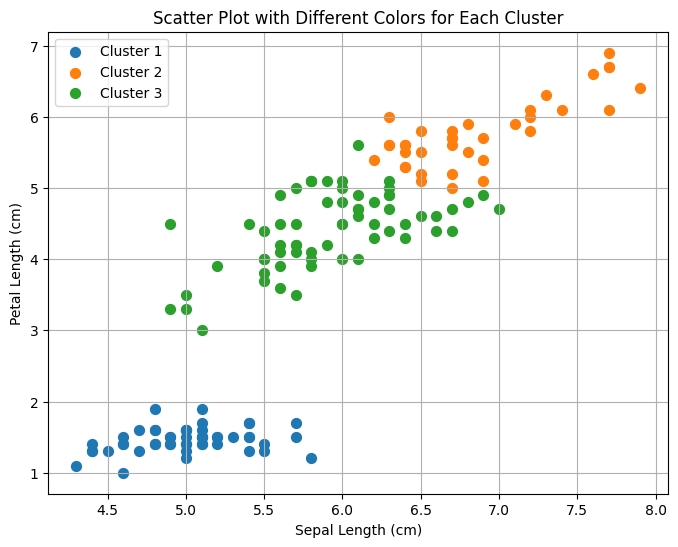

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load iris dataset
iris = load_iris()
Iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Select columns for clustering
X = Iris_data[["sepal length (cm)", "petal length (cm)", "petal width (cm)"]]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the linkage matrix
linked = linkage(X_scaled, method='ward')

# Determine cluster labels based on a specified number of clusters
n_clusters = 3  # Choose the number of clusters
cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')

# Plot the scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
for cluster in range(1, n_clusters + 1):
    plt.scatter(X.iloc[cluster_labels == cluster, 0],  # Sepal length
                X.iloc[cluster_labels == cluster, 1],  # Petal length
                s=50, label=f'Cluster {cluster}')

# Set plot labels and legend
plt.title("Scatter Plot with Different Colors for Each Cluster")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.grid(True)
plt.show()

## It's hard to identify the points in a 2D plot

In this section we're going deeper into the hierarchical clustering demonstration we talked about earlier. First, we've standardized the Iris dataset and figured out how the data points are connected using something called the Ward method.

We tried to understand the clustering results by making a scatter plot, which is like a graph that shows where each data point is. But because there are so many different measurements for each flower, it's hard to see clear groups just from that 2D plot.

So, we're trying out some other ways to help us see the groups better. We're going to try plotting the data in 3D space, which means adding another dimension to our plot to see if that makes the clusters clearer. We're also going to use something called a dendrogram, which is like a tree diagram that shows how the clusters are connected.

By trying out these different ways of looking at the data, we hope to get a better idea of how the flowers are grouped together. This will help us understand more about how hierarchical clustering works and what patterns are hidden in the Iris dataset.

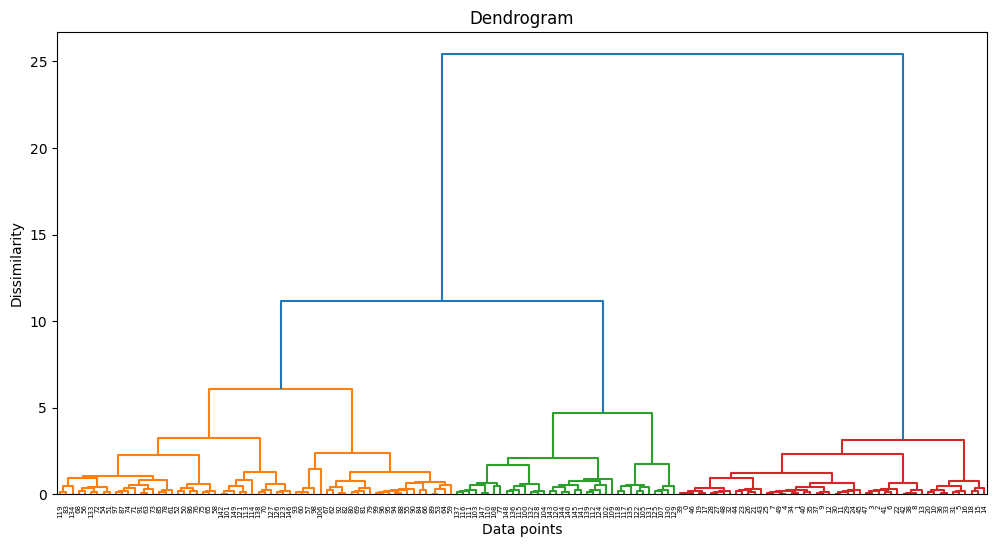

In [3]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load iris dataset
iris = load_iris()
Iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Select columns for clustering
X = Iris_data[["sepal length (cm)", "petal length (cm)", "petal width (cm)"]]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_sample = X.sample(n=20, random_state=1)
# Compute the linkage matrix
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           color_threshold=7)
plt.title("Dendrogram")
plt.ylabel("Dissimilarity")
plt.xlabel("Data points")
plt.show()



## <span style="color:red">Note</span>: As we can see it's hard to identify and analyze the dendrogram so to make it simple and clear we will take a sample of 20 data points only

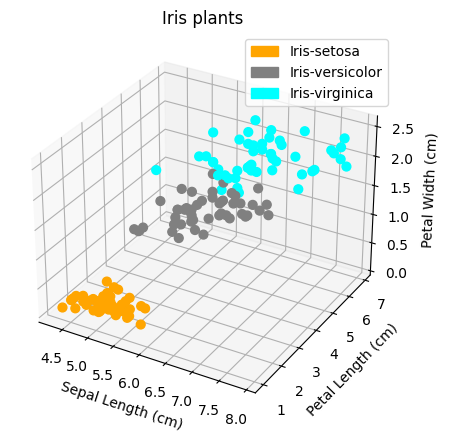

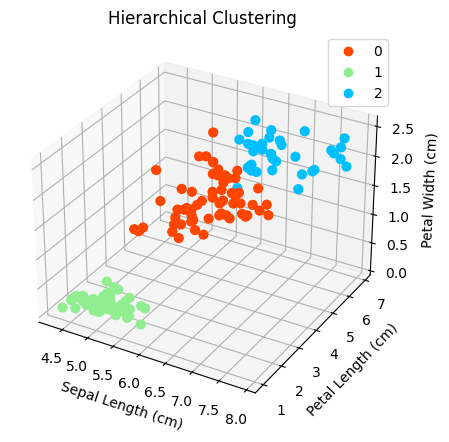

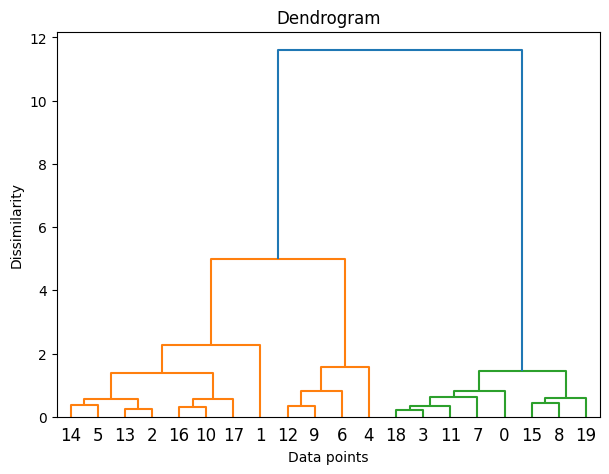

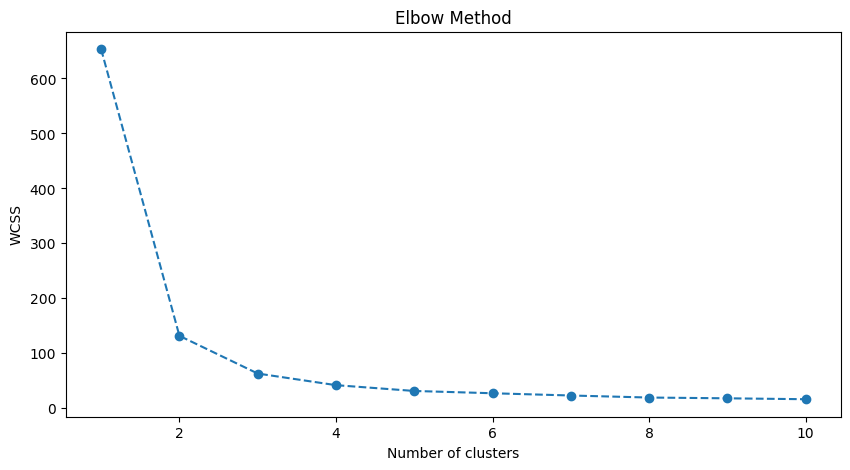

Silhouette Score: 0.5869346258301497
Dunn Index: 0.03776947873000771


In [20]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering,KMeans
from matplotlib.colors import ListedColormap
from scipy.cluster.hierarchy import dendrogram, linkage

# Load iris dataset
iris = load_iris()
Iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add species column
Iris_data['Species'] = iris.target
species_dict = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
Iris_data['Species'] = Iris_data['Species'].map(species_dict)

# Select columns for 3D plot
X = Iris_data[["sepal length (cm)", "petal length (cm)", "petal width (cm)"]]

# Variables
x = X.iloc[:, 0]  # SepalLengthCm
y = X.iloc[:, 1]  # PetalLengthCm
z = X.iloc[:, 2]  # PetalWidthCm

# Axes instance
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Color-code species
colors = {'Iris-setosa': 'orange', 'Iris-versicolor': 'grey', 'Iris-virginica': 'cyan'}

# Plot
ax.scatter(x, y, z, s=40, c=Iris_data["Species"].map(colors), marker='o', alpha=1)

# Legend
orange_patch = mpatches.Patch(color='orange', label='Iris-setosa')
grey_patch = mpatches.Patch(color='grey', label='Iris-versicolor')
cyan_patch = mpatches.Patch(color='cyan', label='Iris-virginica')
ax.legend(handles=[orange_patch, grey_patch, cyan_patch])

# Title
plt.title("Iris plants")

# Axes labels
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')

# Show plot
plt.show()

# Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, linkage="ward")
hc = hc.fit(X)  # Corrected variable name
hc_labels = hc.labels_

# Make a color map for each cluster
cmap = ListedColormap(["orangered", "lightgreen", "deepskyblue"])

# Variables
x = X.iloc[:, 0]  # SepalLengthCm
y = X.iloc[:, 1]  # PetalLengthCm
z = X.iloc[:, 2]  # PetalWidthCm

# Axes instance
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot
sc = ax.scatter(x, y, z, s=40, c=hc_labels, cmap=cmap, marker='o', alpha=1)

# Legend
plt.legend(*sc.legend_elements())

# Title
plt.title("Hierarchical Clustering")

# Axes labels
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')

# Show plot
plt.show()

#Create the dendogram

# Define linkage 
linked = linkage(X.sample(n=20, random_state=1), 'ward')

# Set figure size
plt.figure(figsize=(7, 5))

# Dendrogram function 
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,
            color_threshold=7)

# Plot labels
plt.title("Dendrogram")
plt.ylabel("Dissimilarity")
plt.xlabel("Data points")
plt.show()

# Elbow Method for optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Silhouette Score: Measures the quality of clustering. A higher silhouette score indicates better-defined clusters.
# Calculate Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, hc_labels)
print("Silhouette Score:", silhouette_avg)

# Dunn Index: The ratio of the minimum inter-cluster distance to the maximum intra-cluster distance. Higher values indicate better clustering.
# Calculate Dunn Index
def dunn_index(X, labels):
    from sklearn.metrics import pairwise_distances
    n_clusters = len(set(labels))
    if n_clusters == 1:
        return np.nan
    cluster_distances = []
    for cluster in range(n_clusters):
        cluster_distances.append(pairwise_distances(X[labels == cluster]))
    min_inter_cluster_distance = np.min([np.min(cd[cd != 0]) for cd in cluster_distances])
    max_intra_cluster_distance = np.max([np.max(cd) for cd in cluster_distances])
    return min_inter_cluster_distance / max_intra_cluster_distance


dunn_idx = dunn_index(X, hc_labels)
print("Dunn Index:", dunn_idx)

# At the end

The defualt metric used here is eculidean distance matrix and if we want to change the metric in the linkage function we can use 

linkage(X, method='ward', metric='euclidean')

Euclidean distance ('euclidean')
Manhattan distance ('cityblock')
Cosine distance ('cosine')
Correlation distance ('correlation')
Hamming distance ('hamming') for binary data

If we want to change the euclidean distance we will have to change the linkage method becuase:

Ward's methodminimizes the variance when forming clusters. This minimization of variance is specifically designed around the assumption that Euclidean distances are used.

The Ward linkage criterion is based on the analysis of variance (ANOVA). It evaluates the sum of squared deviations from the mean within each cluster and compares it to the sum of squared deviations that would result from merging two clusters. The goal is to minimize the increase in total within-cluster variance when merging clusters.

Euclidean distance is directly related to the concept of variance because it measures the distance between points in a space where the axes correspond to variables. Minimizing the variance under Euclidean distance ensures that clusters are formed in a way that minimizes the spread of data within each cluster.

When using other distance metrics such as Manhattan or correlation distance, the underlying assumptions about the structure of the data may not align with Ward's method. 
The algorithm might not produce meaningful or optimal results because the concept of variance in these other distance metrics is different from that in Euclidean distance.

In summary, Ward's method requires Euclidean distance because it relies on the concept of variance in a Euclidean space to form clusters that minimize the within-cluster variance. Using other distance metrics would not be appropriate within the context of Ward's method.

___


We used the **elbow method** to validate the number of clusters we might have visually estimated from the dendrogram in hierarchical clustering.

#### The silhouette score
To measure the quality of the clustering. This score indicates how similar a data point is to its own cluster compared to other clusters, with higher scores indicating better-defined clusters.
#### The Dunn Index 
To assess the ratio of the minimum inter-cluster distance to the maximum intra-cluster distance. A higher Dunn Index indicates well-separated and compact clusters.

